Epoch 1/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 152.7038 - val_loss: 0.4313
Epoch 2/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2.9366 - val_loss: 0.5202
Epoch 3/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.7857 - val_loss: 0.6145
Epoch 4/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 5.5518 - val_loss: 0.4561
Epoch 5/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.9026 - val_loss: 0.2626
Epoch 6/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1.3532 - val_loss: 0.6272
Epoch 7/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2.2136 - val_loss: 0.3622
Epoch 8/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1.2619 - val_loss: 0.7736
Epoch 9/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.8495 - val_loss: 0.2452
Epoch 10/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1.6303 - val_loss: 0.3859


C:\Users\bonde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bonde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Number of Anomalies : 2849


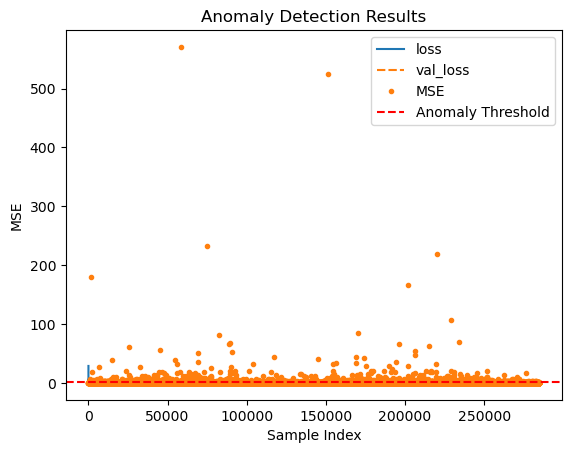

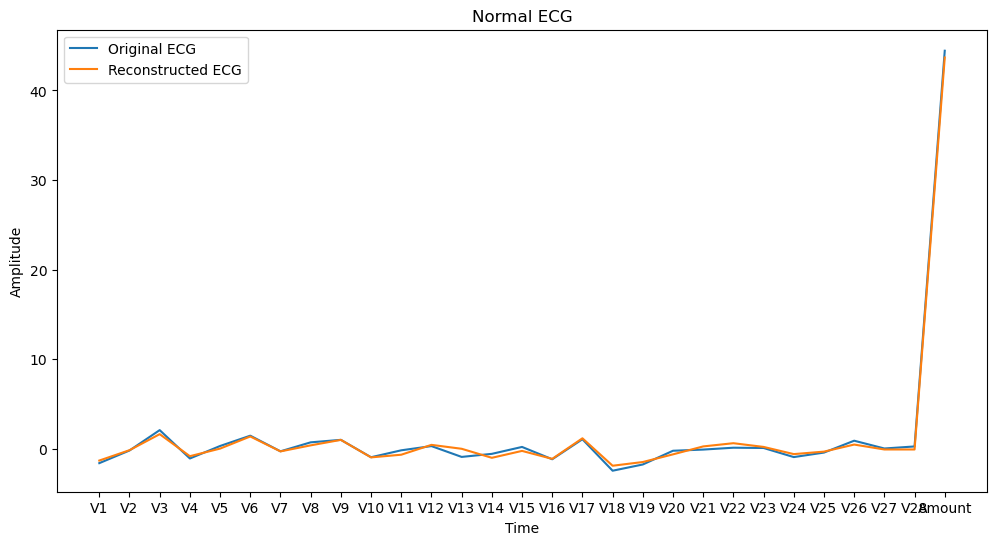

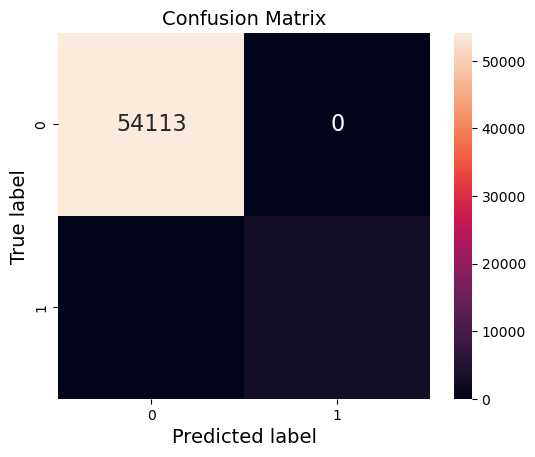

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, models
import tensorflow as tf

df = pd.read_csv('creditcard.csv')
df.head()

df = df.drop(['Time','Class'], axis=1)
x_train, x_test = train_test_split(df, test_size=0.2)

# Encoder
encoder = tf.keras.models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(20, activation='relu')
])

# DEcoder
decoder = tf.keras.models.Sequential([
    layers.Input(shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')
])

# Autoencoder
autoencoder = tf.keras.models.Sequential([
    encoder,
    decoder
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model on the training data
history = autoencoder.fit(
    x_train, x_train,
    validation_data = (x_test, x_test),
    epochs=10,
    batch_size=100,
    shuffle=True
)

import seaborn as sns
sns.lineplot(autoencoder.history.history)

predictions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

threshold = np.percentile(mse, 95)
threshold

anomalies = mse > threshold
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies : {num_anomalies}")

import matplotlib.pyplot as plt

plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE', )
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(x_test.iloc[0], label='Original ECG')
plt.plot(predictions[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()


import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')

plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()
